In [190]:
from inca import Inca
myinca = Inca()
import glob
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline 

fromdate = '2008-01-01'
todate = '2018-12-31'
#listofdoctypes = ['ad (print)','nrc (print)','volkskrant (print)', 'telegraaf (print)', 'trouw (print)']
listofdoctypes = ['ad (print)' , 'trouw (print)', 'volkskrant (print)', 'telegraaf (print)', 'nrc (print)']
exportfields = ['title','title_rss','doctype', 'publication_date', 'byline', 'teaser_rss', 'url',  'text']

#querystring = "text:auto-ongeluk or title:auto-ongeluk or text:auto ongeluk or title:auto ongeluk or text:auto-ongeval or title:auto-ongeval or text:verkeersongeval or title:verkeersongeval"
#qr1 = "text:auto-ongeluk or title:auto-ongeluk or text:auto ongeluk or title:auto ongeluk or text:auto-ongeval or title:auto-ongeval or text:verkeersongeval or title:verkeersongeval"
#qr2 = "marokkaan OR marokkanen OR marokkaans OR marokkaanse OR belg OR belgen OR belgisch OR belgische OR Marokkaan OR Marokkanen OR Marokkaans OR Marokkaanse OR Belg OR Belgen OR Belgisch OR Belgische"
#qr2 = '("seksuele intimidatie" OR "ongewenste intimiteiten" OR "ongewenst seksueel" OR "aanranding" OR "seksueel misbruik" OR "seksueel geweld" OR "verkracht" OR "zeden" OR "ontucht")'
#qr2 = '("immigratie" OR "vluchteling" OR "vluchtelingen" OR "immigranten") AND ("verkrachting" OR "aanranding")'
sex = "'aanranding' OR 'verkrachtingen' OR 'groepsverkrachting' OR 'ontucht' OR 'incest' OR 'zedenmisdrijf' OR 'zedenmisdrijven' OR'verkrachten' OR'groepsverkrachtingen' OR'zedendelict' OR 'aanrandingen' OR'verkrachte' OR 'verkrachtingszaak' OR 'verkracht' OR 'seksuele intimidatie' OR 'seksueel misbruik' OR  'seksueel geweld' OR 'handtastelijkheden'OR  'pedofilie' OR 'vrouwenhandel' OR 'gedwongen_prostitutie' OR 'zedenmisdrijven'"
together = "('aanranding' OR 'verkrachtingen' OR 'groepsverkrachting' OR 'ontucht' OR 'incest' OR 'zedenmisdrijf' OR 'zedenmisdrijven' OR'verkrachten' OR'groepsverkrachtingen' OR'zedendelict' OR 'aanrandingen' OR'verkrachte'OR 'verkrachtingszaak' OR 'verkracht' OR  'seksuele intimidatie' OR 'seksueel misbruik' OR  'seksueel geweld' OR 'handtastelijkheden' OR  'pedofilie' OR 'vrouwenhandel' OR 'gedwongen prostitutie' OR 'zedenmisdrijven') AND ('allochtoon' OR 'allochtonen' OR 'immigrant' OR 'immigranten' OR 'migrant' OR 'vluchteling' OR 'vluchtelingen' OR'eritrea' OR'syrie' OR'somalie' OR'afghanistan' OR'nigeria' OR'pakistan' OR'senegal' OR'irak' OR'bangladesh' OR'gambia' OR 'soedan')"
#querystring2 = '("Europese Raad" OR "Europese Commissie" OR "Europese Centrale Bank" OR "ECB" OR "Europese Parlement" OR "Europaparlement" OR "EU" OR "Europese Unie" OR "Europese Commissie" OR "Eurozone" OR "Eurogroep") OR (Brussel  AND (text:"EU" or text:"Europese Unie" or text:"Europese Commissie" or text:"Europees Parlement" or text:"Europese Parlement" or text:"Europaparlement" or text:"Europese Centrale Bank"))'


q = {"query": {
        "bool": {
           "must": [
              {"query_string" : {
              "fields" : ["title", "text"],
              "query" : together}}],
        "filter": [ {'bool': {'should': [{ "match": { "doctype": d}} for d in listofdoctypes]}},
      { "range": { "publication_date": { "gte": fromdate, "lt":todate }}}]}
        }}


s= {"query": {
        "bool": {
           "must": [
              {"query_string" : {
              "fields" : ["title", "text"],
              "query" : sex}}],
        "filter": [ {'bool': {'should': [{ "match": { "doctype": d}} for d in listofdoctypes]}},
      { "range": { "publication_date": { "gte": fromdate, "lt":todate }}}]}
        }}

INFO:INCA:Providing verbose output


In [109]:
myinca.importers_exporters.export_csv(query = s, fields = exportfields)

INFO:INCA:Dict input: using input as ES query
100%|██████████| 108904/108904 [00:30<00:00, 3538.71it/s]


In [191]:
myinca.importers_exporters.export_csv(query = q, fields = exportfields)

INFO:INCA:Dict input: using input as ES query
100%|██████████| 9913/9913 [00:03<00:00, 2535.73it/s]


In [194]:
# get most recent export file
list_of_files = glob.glob('exports/*.csv') 
latest_file = max(list_of_files, key=os.path.getctime)
print("this is the most recently exported file: {}".format(latest_file))

this is the most recently exported file: exports/INCA_export_2020_1_8_16_53_9.csv


In [112]:
# get file with all attention for sexual assualt

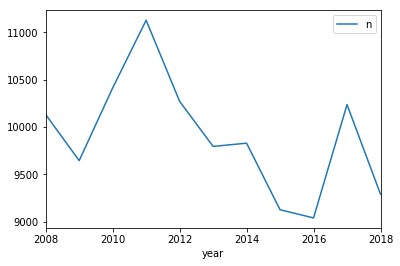

In [200]:
df = pd.read_csv(latest_file)
df.columns = ['title','title_rss','doctype', 'publication_date', 'byline', 'teaser_rss', 'url',  'text']

#to replicate:
#df = pd.read_csv('data/raw/attention_for_sexualthreat.csv')

df['date'] = pd.to_datetime(df['publication_date'], errors='coerce')
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['year']
df['YearMonth'] = df['date'].map(lambda x: 100*x.year + x.month)
df['n'] = 1

# count errors in date parsing 
df['year'].value_counts(dropna=False)
df[df['publication_date'] == df['publication_date'].max()]
#df['year'].value_counts(dropna=False)
df['year'].value_counts()
#len(df)
#df = df[['doctype', 'publication_date', 'year', 'n', 'title']]
#df.to_csv('attention_for_sexualthreat.csv')

df_yearly_totalsex = df.groupby('year', as_index=False).agg({'n': sum})
df_yearly_totalsex.groupby('year').agg({'n': sum}).plot()

In [ ]:
#get file with attention for sexual threat AND minorities:

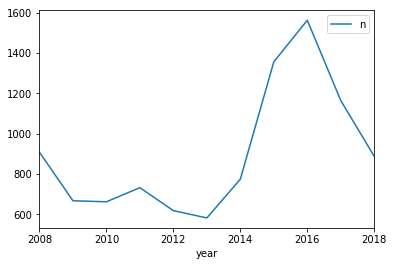

In [198]:
df = pd.read_csv(latest_file)
df.columns = ['title','title_rss','doctype', 'publication_date', 'byline', 'teaser_rss', 'url',  'text']

#to replicate:

#df = pd.read_csv('attention_for_minorities_and_sexualthreat.csv')

df['date'] = pd.to_datetime(df['publication_date'], errors='coerce')
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['year']
df['YearMonth'] = df['date'].map(lambda x: 100*x.year + x.month)
df['n'] = 1

# count errors in date parsing 
df['year'].value_counts(dropna=False)
df[df['publication_date'] == df['publication_date'].max()]
#df['year'].value_counts(dropna=False)
df['year'].value_counts()
#len(df)
df = df[['doctype', 'publication_date', 'year', 'n', 'title']]
df.to_csv('attention_for_minorities_and_sexualthreat.csv')

df_yearly = df.groupby('year', as_index=False).agg({'n': sum})
df_yearly.groupby('year').agg({'n': sum}).plot()


In [ ]:
## get total attention in newspapers

In [81]:
columnstokeep = ['timestamp','1. doctype: "...']

g = myinca.importers_exporters.export_timeline(queries='doctype: "volkskrant (print)"', timefield='publication_date', granularity='year')
volkskrant = pd.read_csv('timeline_export.csv')
volkskrant = volkskrant[columnstokeep]
volkskrant.rename(columns={'1. doctype: "...' : 'vk'}, inplace=True)

INFO:INCA:Calling timeline generator...
INFO:INCA:Saving timeline to timeline_export.csv


In [83]:
g = myinca.importers_exporters.export_timeline(queries='doctype: "ad (print)"', timefield='publication_date', granularity='year')
ad = pd.read_csv('timeline_export.csv')
ad = ad[columnstokeep]
ad.rename(columns={'1. doctype: "...' : 'ad'}, inplace=True)

INFO:INCA:Calling timeline generator...
INFO:INCA:Saving timeline to timeline_export.csv


In [84]:
g = myinca.importers_exporters.export_timeline(queries='doctype: "telegraaf (print)"', timefield='publication_date', granularity='year')
tel = pd.read_csv('timeline_export.csv')
tel = tel[columnstokeep]
tel.rename(columns={'1. doctype: "...' : 'tel'}, inplace=True)

INFO:INCA:Calling timeline generator...
INFO:INCA:Saving timeline to timeline_export.csv


In [86]:
g = myinca.importers_exporters.export_timeline(queries='doctype: "nrc (print)"', timefield='publication_date', granularity='year')
nrc = pd.read_csv('timeline_export.csv')

nrc = nrc[columnstokeep]
nrc.rename(columns={'1. doctype: "...' : 'nrc'}, inplace=True)

INFO:INCA:Calling timeline generator...
INFO:INCA:Saving timeline to timeline_export.csv


In [88]:
g = myinca.importers_exporters.export_timeline(queries='doctype: "trouw (print)"', timefield='publication_date', granularity='year')
trouw = pd.read_csv('timeline_export.csv')

trouw = trouw[columnstokeep]
trouw.rename(columns={'1. doctype: "...' : 'trouw'}, inplace=True)

INFO:INCA:Calling timeline generator...
INFO:INCA:Saving timeline to timeline_export.csv


In [94]:
one = pd.merge(nrc, trouw, how='inner', on='timestamp')
one = pd.merge(one, tel, how='inner', on='timestamp')
one = pd.merge(one, ad, how='inner', on='timestamp')
join_attention = pd.merge(one, volkskrant, how='inner', on='timestamp')

join_attention['date'] = pd.to_datetime(join_attention['timestamp'], errors='coerce')

In [96]:
join_attention['year'] = pd.DatetimeIndex(join_attention['date']).year

In [202]:
join_attention['total_attention'] = join_attention[['ad', 'vk', 'tel', 'trouw', 'nrc']].sum(axis=1)
join_attention.to_csv('total_newsattention.csv')